<img src="https://raw.githubusercontent.com/pelaokano/inel_ML/main/Modulo4/logo_inel.png">

<h1 align="center">Machine Learning Aplicado a la Ingeniería Eléctrica</h1>

<h2 align="center">Ejercicio Aprendizaje No Supervisado</h2>

# EJERCICIO
# Aprendizaje no supervisado: Clustering.

## *Clustering de consumidores*


En el aprendizaje no supervisado, la tarea clásica es el **análisis de clusters** (grupos) en el que se encuentran patrones o grupos ocultos en los datos. La mayoría de las veces las tareas de aprendizaje no supervisado tienen una *solución abierta*, por lo que hay que interpretar los resultados y comprobar si tienen sentido.

**Objetivo:** En este ejemplo se utilizan datos que contienen información acerca del consumo eléctrico de un grupo de consumidores eléctricos. El objetivo es encontrar el número óptimo de clusters para agrupar los diferentes patrones de consumo diarios. El resultado se utilizará para fines comerciales y estratégicos.

### Antes de empezar:

* En el archivo **clustering-consumos.xlsx** se encuentra el conjunto de datos de entrada de este ejemplo (atributos). 
* **NO** existen las etiquetas en el Aprendizaje **NO Supervisado**. 


<img src="https://raw.githubusercontent.com/pelaokano/inel_ML/main/Modulo5/imagenes/creacion-modeloML.png" alt="Drawing" style="width: 800px;"/>


## **1. Importar librerías y datos**

In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Librería de visualización de datos
plt.style.use('seaborn')

# Seleccionamos las columnas que necesitamos
df_consumos = pd.read_excel('Clustering-consumos.xlsx')
df_consumos

,CUPs,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
0,100001,1.38825,1.27750,1.33300,1.18200,1.16975,1.45550,1.34650,1.67500,3.33525,...,3.51475,3.47500,2.99525,5.05475,3.07300,2.92225,2.71925,2.81200,1.99375,1.30350
1,100002,1.32600,1.21750,1.36875,1.13925,1.17775,1.43775,1.33775,1.34300,2.51750,...,2.69000,2.77850,2.70525,3.05175,2.99225,2.61175,2.59775,2.66325,1.26450,1.22750
2,100003,1.21200,1.29750,1.10275,1.08825,1.12450,1.16650,1.11525,NaN,1.68525,...,2.46725,2.25600,2.60200,2.38925,2.56550,2.71550,6.05875,2.66100,2.26025,1.15550
3,100004,1.08925,1.08125,1.11825,1.05975,1.12675,1.08775,1.12525,1.09100,1.53600,...,2.21900,2.25625,2.18575,2.60575,2.54750,2.44475,2.48825,2.73000,1.18325,1.19700
4,100005,0.90800,0.88075,1.03975,0.82750,1.02300,0.98700,1.07275,1.19575,1.49650,...,2.76200,2.90275,2.70900,2.76900,2.78775,2.67200,3.27650,2.76150,3.36600,2.14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,100252,1.68200,1.55525,1.57375,1.46200,1.66000,1.47525,1.60150,1.63375,1.78575,...,1.89925,1.79100,1.85325,1.82325,1.97150,1.79450,2.21100,1.89000,1.70550,1.71850
252,100253,1.79250,0.97075,0.82950,0.96225,0.77725,1.00650,0.79150,0.67100,1.41625,...,2.47525,2.46250,2.61450,2.71100,2.55925,2.20800,2.45825,3.19175,3.58075,1.05525
253,100254,1.13575,1.13525,1.17850,1.12550,0.98550,1.02925,1.08450,1.52875,2.09125,...,2.45100,2.34800,2.15850,2.45825,4.37475,2.44075,2.07200,2.14900,1.99575,1.85025
254,100255,1.22625,1.00950,1.12175,0.94050,1.10650,1.03750,1.13200,1.46200,2.24275,...,2.14100,2.22425,2.08325,2.35125,2.23175,2.15875,2.32100,1.82750,1.10375,1.12300


## **2. Comprender los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

<div class="alert alert-success">
    <b> ¿Cuántos datos hay?¿Cuántos atributos hay en los datos? </b>
</div>

In [2]:
# Dimensión de los datos de entrada (filas x columnas)
df_consumos.shape

(256, 25)

In [3]:
# Veamos como es la apariencia de los datos
df_consumos.head()

,CUPs,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
0,100001,1.38825,1.27750,1.33300,1.18200,1.16975,1.45550,1.34650,1.67500,3.33525,...,3.51475,3.47500,2.99525,5.05475,3.07300,2.92225,2.71925,2.81200,1.99375,1.3035
1,100002,1.32600,1.21750,1.36875,1.13925,1.17775,1.43775,1.33775,1.34300,2.51750,...,2.69000,2.77850,2.70525,3.05175,2.99225,2.61175,2.59775,2.66325,1.26450,1.2275
2,100003,1.21200,1.29750,1.10275,1.08825,1.12450,1.16650,1.11525,NaN,1.68525,...,2.46725,2.25600,2.60200,2.38925,2.56550,2.71550,6.05875,2.66100,2.26025,1.1555
3,100004,1.08925,1.08125,1.11825,1.05975,1.12675,1.08775,1.12525,1.09100,1.53600,...,2.21900,2.25625,2.18575,2.60575,2.54750,2.44475,2.48825,2.73000,1.18325,1.1970
4,100005,0.90800,0.88075,1.03975,0.82750,1.02300,0.98700,1.07275,1.19575,1.49650,...,2.76200,2.90275,2.70900,2.76900,2.78775,2.67200,3.27650,2.76150,3.36600,2.1470


In [4]:
df_consumos.tail()

,CUPs,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
251,100252,1.68200,1.55525,1.57375,1.46200,1.66000,1.47525,1.60150,1.63375,1.78575,...,1.89925,1.79100,1.85325,1.82325,1.97150,1.79450,2.21100,1.89000,1.70550,1.71850
252,100253,1.79250,0.97075,0.82950,0.96225,0.77725,1.00650,0.79150,0.67100,1.41625,...,2.47525,2.46250,2.61450,2.71100,2.55925,2.20800,2.45825,3.19175,3.58075,1.05525
253,100254,1.13575,1.13525,1.17850,1.12550,0.98550,1.02925,1.08450,1.52875,2.09125,...,2.45100,2.34800,2.15850,2.45825,4.37475,2.44075,2.07200,2.14900,1.99575,1.85025
254,100255,1.22625,1.00950,1.12175,0.94050,1.10650,1.03750,1.13200,1.46200,2.24275,...,2.14100,2.22425,2.08325,2.35125,2.23175,2.15875,2.32100,1.82750,1.10375,1.12300
255,100256,1.26575,1.03325,1.08950,0.87675,1.01025,0.91675,1.06425,1.21125,1.87400,...,2.25650,2.34125,2.68425,2.47175,2.34625,2.20875,2.13550,2.02500,1.98725,1.17700


<div class="alert alert-success">
    <b> Ponemos como índice el identificador del contador inteligente (CUP) </b>
</div>

In [5]:
# Pongo como índice el número de CUP 
df_consumos.set_index('CUPs', inplace = True)
df_consumos

,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,h-9,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
CUPs,,,,,,,,,,,,,,,,,,,,,
100001,1.38825,1.27750,1.33300,1.18200,1.16975,1.45550,1.34650,1.67500,3.33525,2.98525,...,3.51475,3.47500,2.99525,5.05475,3.07300,2.92225,2.71925,2.81200,1.99375,1.30350
100002,1.32600,1.21750,1.36875,1.13925,1.17775,1.43775,1.33775,1.34300,2.51750,2.68600,...,2.69000,2.77850,2.70525,3.05175,2.99225,2.61175,2.59775,2.66325,1.26450,1.22750
100003,1.21200,1.29750,1.10275,1.08825,1.12450,1.16650,1.11525,NaN,1.68525,2.06150,...,2.46725,2.25600,2.60200,2.38925,2.56550,2.71550,6.05875,2.66100,2.26025,1.15550
100004,1.08925,1.08125,1.11825,1.05975,1.12675,1.08775,1.12525,1.09100,1.53600,2.18075,...,2.21900,2.25625,2.18575,2.60575,2.54750,2.44475,2.48825,2.73000,1.18325,1.19700
100005,0.90800,0.88075,1.03975,0.82750,1.02300,0.98700,1.07275,1.19575,1.49650,2.45325,...,2.76200,2.90275,2.70900,2.76900,2.78775,2.67200,3.27650,2.76150,3.36600,2.14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100252,1.68200,1.55525,1.57375,1.46200,1.66000,1.47525,1.60150,1.63375,1.78575,1.73575,...,1.89925,1.79100,1.85325,1.82325,1.97150,1.79450,2.21100,1.89000,1.70550,1.71850
100253,1.79250,0.97075,0.82950,0.96225,0.77725,1.00650,0.79150,0.67100,1.41625,2.26900,...,2.47525,2.46250,2.61450,2.71100,2.55925,2.20800,2.45825,3.19175,3.58075,1.05525
100254,1.13575,1.13525,1.17850,1.12550,0.98550,1.02925,1.08450,1.52875,2.09125,2.03325,...,2.45100,2.34800,2.15850,2.45825,4.37475,2.44075,2.07200,2.14900,1.99575,1.85025


<div class="alert alert-success">
    <b> Comprobamos si existe algún dato categórico que haya que transformar </b>
</div>

In [6]:
df_consumos.dtypes

h-0     float64
h-1     float64
h-2     float64
h-3     float64
h-4     float64
h-5     float64
h-6     float64
h-7     float64
h-8     float64
h-9     float64
h-10    float64
h-11    float64
h-12    float64
h-13    float64
h-14    float64
h-15    float64
h-16    float64
h-17    float64
h-18    float64
h-19    float64
h-20    float64
h-21    float64
h-22    float64
h-23    float64
dtype: object

<div class="alert alert-success">
    <b> ¿Falta algún dato? </b>
</div>

Se comprueba si falta algún dato, y de ser así, se realiza el recuento de celdas vacías en cada atributo. En este caso, no falta ningún dato en el conjunto de datos de entrada (no existen valores *Nan*).

In [7]:
df_consumos.isna().sum()

h-0     0
h-1     0
h-2     1
h-3     1
h-4     0
h-5     0
h-6     0
h-7     1
h-8     0
h-9     0
h-10    0
h-11    0
h-12    0
h-13    0
h-14    0
h-15    1
h-16    1
h-17    0
h-18    0
h-19    0
h-20    0
h-21    0
h-22    0
h-23    0
dtype: int64

Aplicamos **interpolación** para imputar los valores que faltan

In [8]:
# Imputación de datos con pandas
df_consumos.interpolate(method='polynomial', order=1, inplace = True)


In [9]:
# Comprobamos que se han imputado los valores correctamente
df_consumos.isna().sum()

h-0     0
h-1     0
h-2     0
h-3     0
h-4     0
h-5     0
h-6     0
h-7     0
h-8     0
h-9     0
h-10    0
h-11    0
h-12    0
h-13    0
h-14    0
h-15    0
h-16    0
h-17    0
h-18    0
h-19    0
h-20    0
h-21    0
h-22    0
h-23    0
dtype: int64

<div class="alert alert-success">
    <b> Resumen estadístico del conjunto de datos de entrada: </b>
</div>

La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).

In [10]:
# Evaluamos la naturaleza de los datos con datos estadísticos descriptivos
df_consumos.describe()

,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,h-9,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,1.359629,1.374915,1.421566,1.206677,1.180396,1.194541,1.228682,1.307136,1.799206,2.159315,...,3.007703,2.926959,3.146455,3.235438,3.242852,3.251154,3.183280,3.077850,2.441622,1.728979
std,0.547173,0.581441,0.611983,0.438387,0.454987,0.366187,0.399483,0.423533,0.733662,0.603190,...,1.111755,1.162918,1.230784,1.263228,1.218442,1.227502,1.238132,1.161864,1.039147,0.857153
min,0.700750,0.461500,0.531000,0.342000,0.382500,0.386000,0.438750,0.326750,0.335000,0.406500,...,0.949750,0.620000,1.073250,1.007000,0.866750,0.903750,1.083250,1.031250,0.804750,0.667500
25%,0.961125,0.970688,0.987625,0.929625,0.909000,0.963250,0.996937,1.046625,1.354437,1.860750,...,2.260438,2.214562,2.352063,2.379125,2.410062,2.440062,2.382500,2.320875,1.722750,1.115375
50%,1.171500,1.159375,1.157125,1.050375,1.061625,1.102000,1.110125,1.217125,1.743750,2.146375,...,2.700750,2.577375,2.779250,2.835750,2.984750,2.876500,2.821500,2.771000,2.166625,1.466125
75%,1.670187,1.650250,1.800500,1.403812,1.246813,1.279062,1.335313,1.470187,2.055875,2.428000,...,3.633125,3.463188,3.741500,3.922000,3.872375,3.848000,3.766437,3.637375,2.934938,2.139687
max,3.726500,3.918250,4.232500,3.955000,4.324500,3.079250,3.167000,3.432000,6.104500,4.250750,...,6.829750,6.860000,8.119750,9.125750,7.552750,7.936250,8.333500,6.749250,7.336750,6.599000


## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada. 
1. Histograma
2. Curva de densidad
3. Boxplots


<div class="alert alert-success">
    <b>Histograma </b>
</div>


Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.

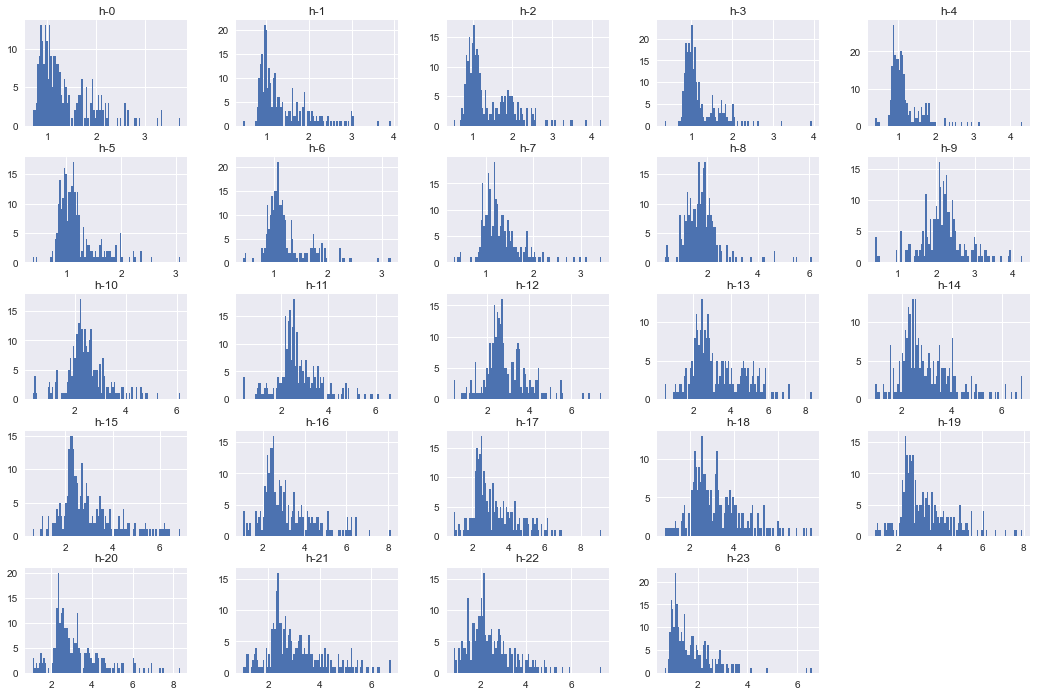

In [11]:
histograma = df_consumos.hist(xlabelsize=10, ylabelsize=10, bins=100, figsize=(18, 12))

<div class="alert alert-success">
    <b> Gráfico de densidades </b>
</div>

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

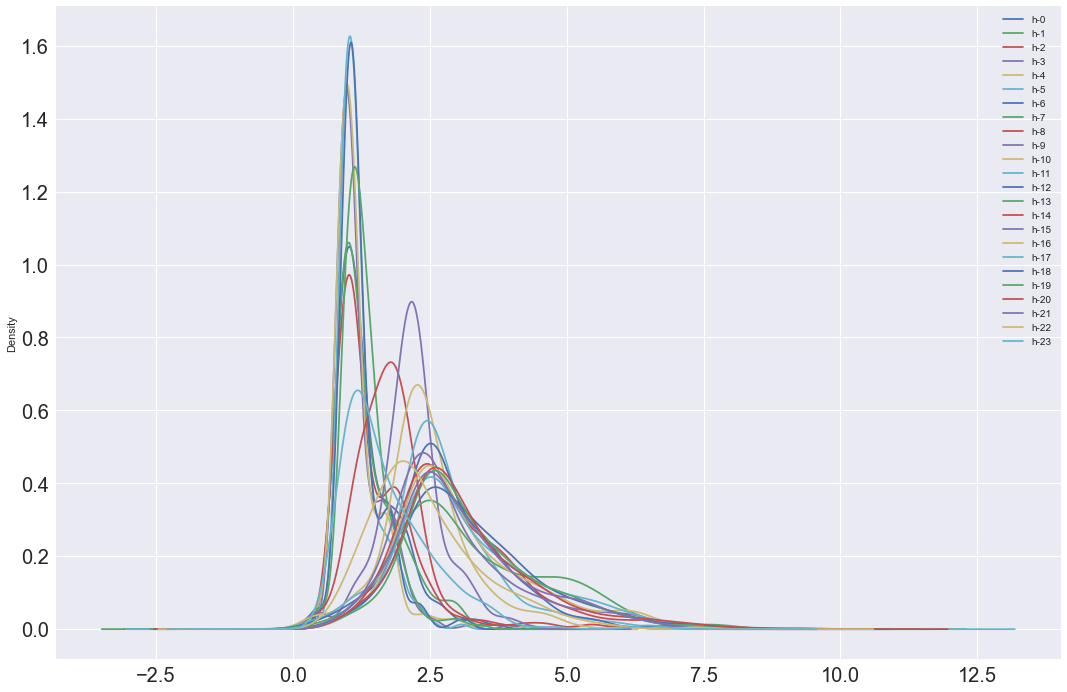

In [12]:
density = df_consumos.plot(kind='kde', legend=True, layout=(1, 1), figsize=(18, 12),
                        fontsize=20, stacked=True) 

<div class="alert alert-success">
    <b> Boxplots </b>
</div>


El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).
 

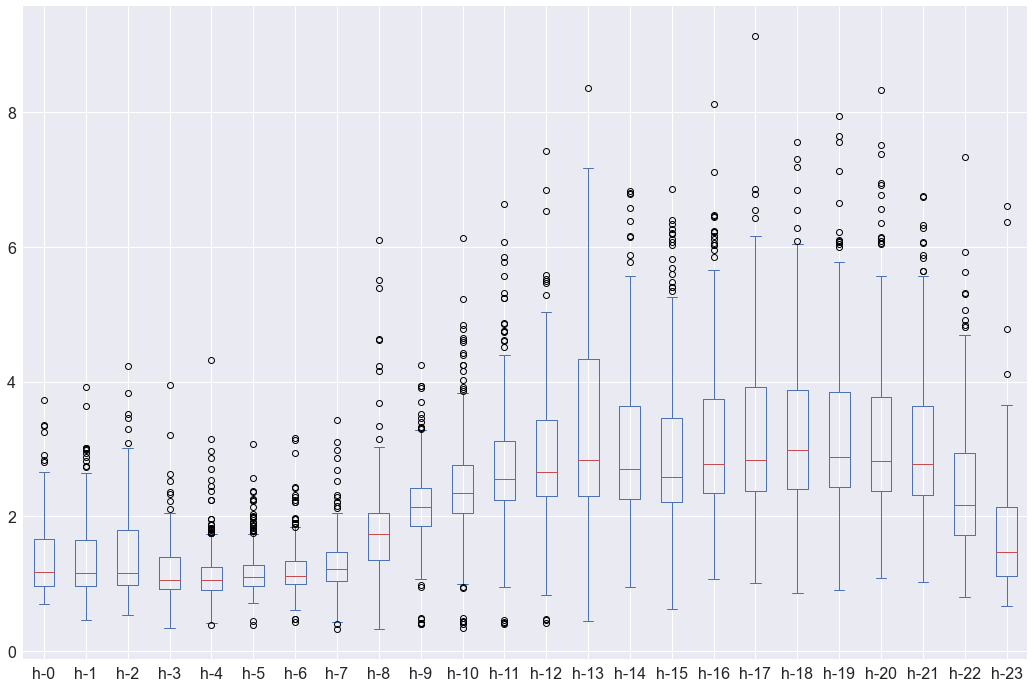

In [13]:
boxplot = df_consumos.plot(kind='box', legend=True, layout=(1, 1), figsize=(18, 12),
                        fontsize=16, stacked=True) 


## *4. Preparar los datos*



<div class="alert alert-success">
    <b> Graficamos los datos de consumo </b>
</div>

El gráfico muestra el consumo horario de un grupo de consumidores durante un día.

<AxesSubplot:title={'center':'Consumo diario'}, ylabel='Energía Consumida [kWh]'>

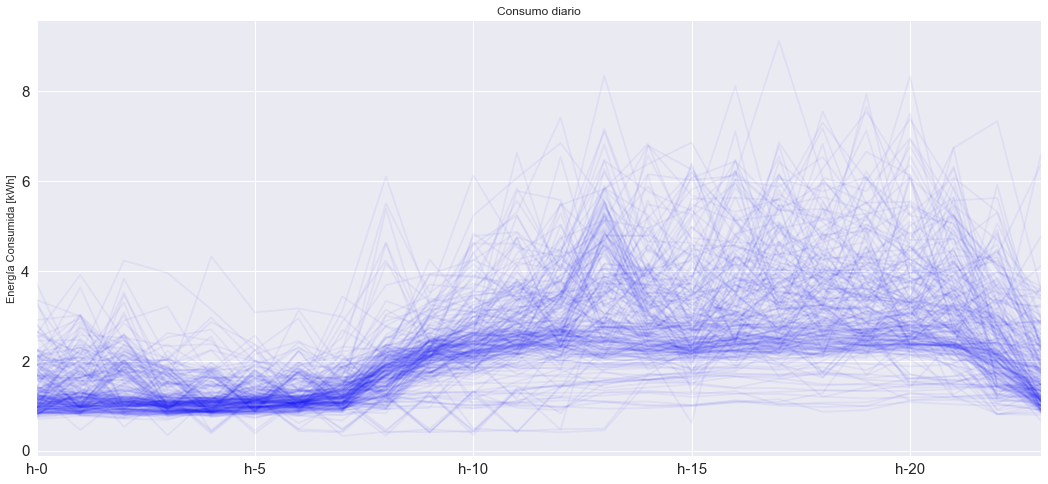

In [14]:
# Consumo horario
df_consumos.T.plot(figsize=(18, 8), title='Consumo diario', legend=False, color='blue', alpha=0.05, 
                   fontsize=15, xlim=[0,23], ylabel='Energía Consumida [kWh]')



<div class="alert alert-success">
    <b> Escalar los datos </b>
</div>


<img src="Figures\scaling.png" alt="Drawing" style="width: 400px;"/>

Como ya se ha comentado, tanto **MinMaxScaler()** como **StandardScaler()** se utilizan comúnmente para escalar datos antes de aplicar el algoritmo de clustering. Sin embargo, la elección entre ellos depende de las características específicas de los datos y requisitos del análisis.

* **MinMaxScaler()** escala los datos a un rango fijo, generalmente entre 0 y 1. Esto puede ser útil si los datos tienen un rango limitado y se desea preservar la relación entre los valores de diferentes features/características. Sin embargo, puede no ser adecuado para datos con valores atípicos/outliers, ya que pueden tener un impacto desproporcionado en la escala.

* **StandardScaler()** escala los datos para tener una media cero y una varianza unitaria, lo que lo hace útil para datos que están distribuidos de manera normal o tienen una distribución similar. Puede ser más robusto a los valores atípicos que MinMaxScaler(), pero puede que no preserve la relación entre los valores de diferentes características.

Se escalan los datos utilizando el método de *MinMaxScaler()*

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df_consumos.values.copy()
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_scale.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.227216,0.236060,0.216669,0.232494,0.199708,0.397104,0.332722,0.434184,0.520019,0.670807,...,0.436224,0.457532,0.272760,0.498568,0.329981,0.287025,0.225647,0.311429,0.182027,0.107224
1,0.206643,0.218703,0.226327,0.220662,0.201738,0.390513,0.329515,0.327268,0.378282,0.592964,...,0.295961,0.345913,0.231604,0.251855,0.317903,0.242872,0.208889,0.285414,0.070384,0.094411
2,0.168966,0.241846,0.154464,0.206546,0.188229,0.289799,0.247961,0.286692,0.234032,0.430513,...,0.258078,0.262179,0.216952,0.170254,0.254076,0.257625,0.686252,0.285021,0.222826,0.082273
3,0.128398,0.179287,0.158652,0.198658,0.188800,0.260559,0.251627,0.246115,0.208164,0.461533,...,0.215859,0.262220,0.157880,0.196921,0.251383,0.219125,0.193786,0.297088,0.057945,0.089269
4,0.068495,0.121284,0.137444,0.134376,0.162481,0.223150,0.232383,0.279849,0.201317,0.532419,...,0.308206,0.365825,0.232137,0.217028,0.287317,0.251440,0.302507,0.302597,0.392108,0.249431


<div class="alert alert-success">
    <b> Guardamos el scaler de los datos de entreno para utilizarlo luego </b>
</div>


In [16]:
import joblib

# Guardamos el scaler en un archivo para utilizarlo luego
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

## 5. Construcción del modelo de aprendizaje NO supervisado: Clustering de consumos utilizando K-means

Se agrupan los datos utilizando el algoritmo [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

El algoritmo K-means necesita que se le indique el número de clústers en que se quieren agrupar los datos. Se ejecuta el algoritmo para varios clusters y luego se comparan los resultados utilizando el método Elbow, que indicará el número óptimo de clusters.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

elbow_method = []

# Evalúo el algoritmo K-means para un rango de [2,10] clústers 
n_cluster_list = range(2,15)
print(list(n_cluster_list))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


### ¿Cómo saber el número óptimo de clusters? Con el método de Elbow.



<div class="alert alert-success">
    <b> Aplicamos el método de Elbow como métrica para selecionar un número óptimo de clusters. 
</div>
    
Se utiliza el [Método de Elbow] para ayudarnos a elegir el número óptimo de clusters. 

* Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide.
* Para hacer uso de este método partimos del cálculo de la distorsión promedio de cada clúster, esto es la distancia de cada elemento con su centroide correspondiente.
* Buscamos la parte de la gráfica donde la línea es menos suave o cambia abruptamente lo que forma un “codo”.

[Método de Elbow]: https://jarroba.com/seleccion-del-numero-optimo-clusters/

    
**EJEMPLO:**

<img src="Figures\elbow-method.png" alt="Drawing" style="width: 800px;"/>

<div class="alert alert-success">
    <b> Método de Elbow. 
</div>

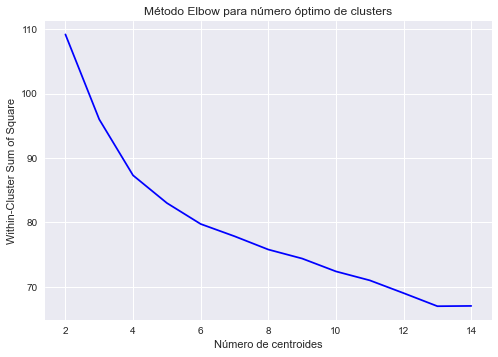

In [18]:
import matplotlib.pyplot as plt

# Iteración para evaluar K-means para diferentes números de clusters (n_clusters)
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_found = kmeans.fit_predict(X_scale)
    elbow_method.append(kmeans.inertia_) 


# Gráfica del método de Elbow
plt.plot(n_cluster_list, elbow_method, 'bx-')
plt.xlabel('Número de centroides')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('Método Elbow para número óptimo de clusters')
plt.show()

# El número óptimo de clusters es...¿

<div class="alert alert-success">
    <b> Entrenar el algorithmo de clustering K-Means con k clusters 
</div>

In [19]:
# Entreno el K-means para k=X, visto el resultado del método Elbow
kmeans = KMeans(n_clusters=4)
cluster_found = kmeans.fit_predict(X_scale)
cluster_found_sr = pd.Series(cluster_found, name='cluster')

# Creo un multindex del tipo: (fecha,cluster al que pertenece el día)
df_consumos = df_consumos.set_index(cluster_found_sr, append=True)

#Guardamos los clusters en un excel
df_consumos.to_excel('resultados-clusters.xlsx')

df_consumos.index

MultiIndex([(100001, 2),
            (100002, 0),
            (100003, 0),
            (100004, 0),
            (100005, 0),
            (100006, 0),
            (100007, 0),
            (100008, 0),
            (100009, 0),
            (100010, 0),
            ...
            (100247, 0),
            (100248, 3),
            (100249, 3),
            (100250, 3),
            (100251, 3),
            (100252, 3),
            (100253, 0),
            (100254, 0),
            (100255, 0),
            (100256, 0)],
           names=['CUPs', 'cluster'], length=256)

In [20]:
df_consumos

,,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,h-9,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
CUPs,cluster,,,,,,,,,,,,,,,,,,,,,
100001,2,1.38825,1.27750,1.33300,1.18200,1.16975,1.45550,1.34650,1.67500,3.33525,2.98525,...,3.51475,3.47500,2.99525,5.05475,3.07300,2.92225,2.71925,2.81200,1.99375,1.30350
100002,0,1.32600,1.21750,1.36875,1.13925,1.17775,1.43775,1.33775,1.34300,2.51750,2.68600,...,2.69000,2.77850,2.70525,3.05175,2.99225,2.61175,2.59775,2.66325,1.26450,1.22750
100003,0,1.21200,1.29750,1.10275,1.08825,1.12450,1.16650,1.11525,1.21700,1.68525,2.06150,...,2.46725,2.25600,2.60200,2.38925,2.56550,2.71550,6.05875,2.66100,2.26025,1.15550
100004,0,1.08925,1.08125,1.11825,1.05975,1.12675,1.08775,1.12525,1.09100,1.53600,2.18075,...,2.21900,2.25625,2.18575,2.60575,2.54750,2.44475,2.48825,2.73000,1.18325,1.19700
100005,0,0.90800,0.88075,1.03975,0.82750,1.02300,0.98700,1.07275,1.19575,1.49650,2.45325,...,2.76200,2.90275,2.70900,2.76900,2.78775,2.67200,3.27650,2.76150,3.36600,2.14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100252,3,1.68200,1.55525,1.57375,1.46200,1.66000,1.47525,1.60150,1.63375,1.78575,1.73575,...,1.89925,1.79100,1.85325,1.82325,1.97150,1.79450,2.21100,1.89000,1.70550,1.71850
100253,0,1.79250,0.97075,0.82950,0.96225,0.77725,1.00650,0.79150,0.67100,1.41625,2.26900,...,2.47525,2.46250,2.61450,2.71100,2.55925,2.20800,2.45825,3.19175,3.58075,1.05525
100254,0,1.13575,1.13525,1.17850,1.12550,0.98550,1.02925,1.08450,1.52875,2.09125,2.03325,...,2.45100,2.34800,2.15850,2.45825,4.37475,2.44075,2.07200,2.14900,1.99575,1.85025


<div class="alert alert-success">
    <b> Mostrar los resultados de este Clustering de consumos 
</div>

Text(0.5, 0, 'Horas')

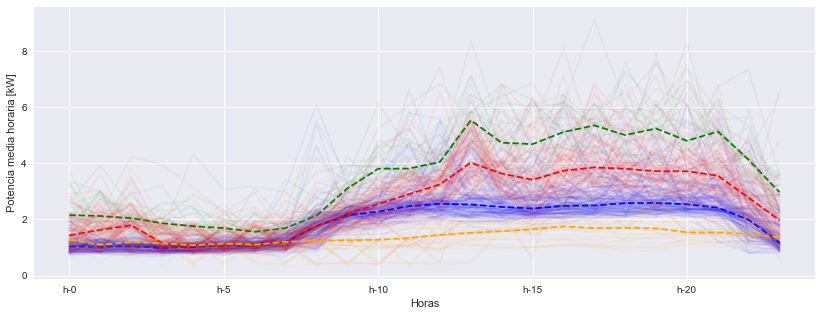

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
color_list = ['blue', 'green', 'red', 'orange']
cluster_values = sorted(df_consumos.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    # ploteo todas las lineas de cada cluster
    df_consumos.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.05, color=color)
    # ploteo la línea con el valor de la mediana de cada cluster
    df_consumos.xs(cluster, level=1).median().plot(ax=ax, color=color, legend=False, alpha=1, ls='--')

ax.set_ylabel('Potencia media horaria [kW]')
ax.set_xlabel('Horas')


## (Extra) Validar los resultados con Dimensionality Reduction (PCA)

*  Explicación de PCA visualmente. https://setosa.io/ev/principal-component-analysis/


* Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Se reducen las "features" de 24 a 2. 
* Una forma de validar los resultados del algoritmo clustering es mediante técnicas de dimensionality reduction. Hay que tener en cuenta es que el PCA no sabe nada de los grupos encontrados por K-means.

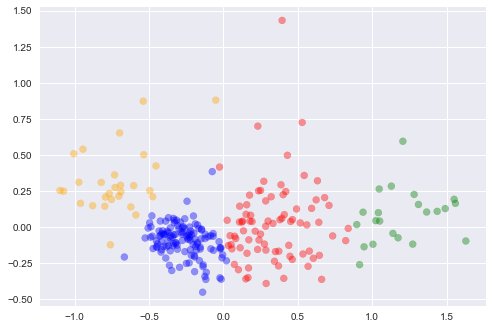

In [22]:
from sklearn.decomposition import PCA
import matplotlib.colors

pca = PCA(n_components=2)  
results_pca = pca.fit_transform(X_scale)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)

plt.scatter(results_pca[:, 0], results_pca[:, 1],
            c = df_consumos.index.get_level_values('cluster'),
            cmap=cmap,
            alpha=0.4,
            )
plt.show()

<div class="alert alert-success">
    <b> Guarda el modelo entrenado de K-means para utilizarlo más tarde y no tener que entrenarlo de nuevo. </b>
</div>


<img src="Figures\save-ml-model.png" alt="Drawing" style="width: 1200px;"/>


In [23]:

import joblib

# Save the model to a file
joblib.dump(kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

# Cargar un modelo de K-Means guardado y predecir clusters a partir de nuevos datos.

<div class="alert alert-success">
    <b> Carga el modelo entrenado de K-means y el scaler con los datos de entreno. </b>
</div>


In [24]:
# Cargo el modelo de k-means
kmeans = joblib.load('kmeans_model.joblib')
kmeans

KMeans(n_clusters=4)

In [25]:
# Cargo el scaler del archivo
scaler = joblib.load('scaler.joblib')
scaler

MinMaxScaler()

<div class="alert alert-success">
    <b> Cargo los nuevos datos de entrada </b>
</div>

In [27]:
import pandas as pd

new_data = pd.read_excel('Clustering-consumos-new-data.xlsx')

In [28]:

# Pongo como índice el número de CUP 
new_data.set_index('CUPs', inplace = True)
new_data.head()

,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,h-9,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
CUPs,,,,,,,,,,,,,,,,,,,,,
100258,1.13700,0.93750,1.11950,1.19025,0.97950,1.17275,1.14325,1.15500,2.32825,2.09400,...,2.20150,2.17400,2.25850,2.52675,2.54050,2.66825,2.77675,2.74600,2.15775,1.46850
100259,1.17350,1.08250,1.17650,1.18550,1.06975,1.17825,1.20325,1.18275,1.89750,2.09100,...,2.13600,1.99725,2.18975,2.03650,2.61750,2.54050,2.59850,2.54175,1.94375,1.48050
100260,1.19525,1.13200,1.27125,1.06575,1.11325,1.05725,1.11175,1.27900,2.39700,2.16825,...,2.20325,1.98375,1.95600,2.09575,2.20000,2.13725,2.34650,3.12725,3.15850,0.92475
100261,1.27550,1.10525,1.09850,1.01425,1.14525,0.99250,1.15275,1.17500,2.13100,2.44250,...,2.41625,2.33900,2.58100,2.29000,2.30750,2.45325,2.54075,2.17350,1.30975,1.31200
100262,1.42325,1.28775,1.24875,1.40300,1.27250,1.31175,1.82450,1.44750,1.17950,1.55325,...,2.17025,2.17125,2.17850,2.30250,2.22375,2.28800,2.36450,2.23900,1.30100,1.36625


<div class="alert alert-success">
    <b> Debo de escalar estos nuevos datos de entrada, ya que en el entrenamiento han sido escalados. </b>
</div>


In [29]:
new_data_scaled = pd.DataFrame(scaler.transform(new_data))
#new_data_scaled.columns = new_data.columns
new_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.144179,0.137702,0.158990,0.234777,0.151446,0.292119,0.258224,0.266726,0.345481,0.438967,...,0.212883,0.249038,0.168204,0.187190,0.250337,0.250907,0.233578,0.299886,0.207134,0.135042
1,0.156242,0.179649,0.174389,0.233462,0.174340,0.294161,0.280216,0.275662,0.270821,0.438187,...,0.201743,0.220713,0.158447,0.126805,0.261853,0.232741,0.208993,0.264166,0.174372,0.137065
2,0.163431,0.193968,0.199986,0.200318,0.185375,0.249234,0.246678,0.306658,0.357397,0.458282,...,0.213180,0.218550,0.125275,0.134103,0.199409,0.175400,0.174235,0.366562,0.360341,0.043370
3,0.189953,0.186230,0.153316,0.186064,0.193493,0.225193,0.261706,0.273166,0.311292,0.529622,...,0.249405,0.275481,0.213971,0.158029,0.215488,0.220334,0.201028,0.199764,0.077312,0.108657
4,0.238784,0.239025,0.193908,0.293662,0.225774,0.343730,0.507926,0.360921,0.146373,0.298303,...,0.207568,0.248598,0.156851,0.159569,0.202961,0.196836,0.176718,0.211219,0.075972,0.117803


In [30]:
# !pip install --upgrade scikit-learn threadpoolctl

<div class="alert alert-success">
    <b> Realizo predicciones de cluster de los datos nuevos, utilizando el modelo K-Means entrenado anteriormente. </b>
</div>

In [31]:
predicted_labels = kmeans.predict(new_data_scaled)

In [32]:
# Visualizo el resultado del clustering de datos nuevos
predicted_labels

array([0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [33]:
cluster_found_new_data_sr = pd.Series(predicted_labels, name='cluster')
cluster_found_new_data_sr

0     0
1     0
2     0
3     0
4     3
5     2
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    2
17    0
18    0
19    0
Name: cluster, dtype: int32

In [34]:
# Creo un multindex del tipo: (fecha,cluster al que pertenece el día)
new_data = new_data.set_index(cluster_found_new_data_sr, append=True)
new_data.index

MultiIndex([(100258, 0),
            (100259, 0),
            (100260, 0),
            (100261, 0),
            (100262, 3),
            (100263, 2),
            (100264, 0),
            (100265, 0),
            (100267, 0),
            (100268, 0),
            (100269, 0),
            (100270, 0),
            (100271, 0),
            (100272, 0),
            (100273, 0),
            (100274, 0),
            (100275, 2),
            (100276, 0),
            (100277, 0),
            (100278, 0)],
           names=['CUPs', 'cluster'])

<div class="alert alert-success">
    <b> RECORDATORIO: Grafico otra vez los consumos de entreno obtenidos, para luego comparar. </b>
</div>


Color: blue se asocia al clúster  0
Color: green se asocia al clúster  1
Color: red se asocia al clúster  2
Color: orange se asocia al clúster  3


Text(0.5, 0, 'Horas')

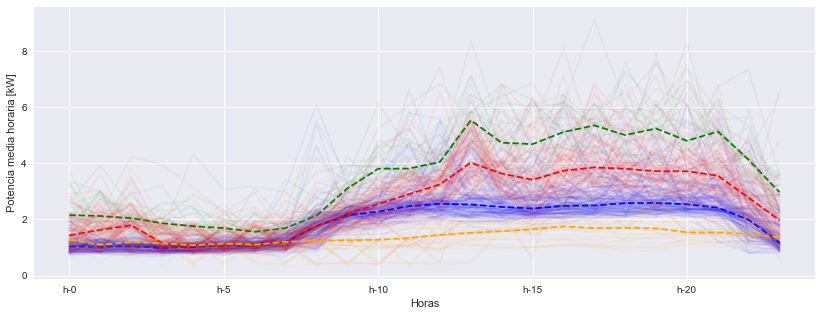

In [35]:

fig, ax = plt.subplots(1, 1, figsize=(14,5))
color_list = ['blue', 'green', 'red', 'orange']
cluster_values = sorted(df_consumos.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    # ploteo todas las lineas de cada cluster
    df_consumos.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.05, color=color)
    # ploteo la línea con el valor de la mediana de cada cluster
    df_consumos.xs(cluster, level=1).median().plot(ax=ax, color=color, legend=False, alpha=1, ls='--')
    print("Color:", color, "se asocia al clúster ", cluster)

ax.set_ylabel('Potencia media horaria [kW]')
ax.set_xlabel('Horas')


<div class="alert alert-success">
    <b> Grafico los nuevos datos </b>
</div>

<AxesSubplot:title={'center':'Consumo diario'}, ylabel='Energía Consumida [kWh]'>

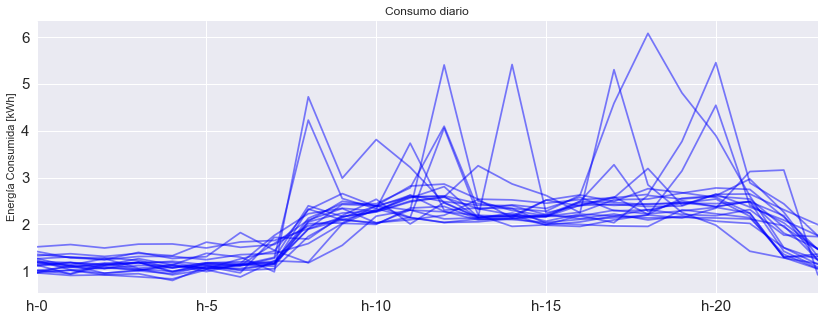

In [36]:
# Consumo horario
new_data.T.plot(figsize=(14, 5), title='Consumo diario', legend=False, color='blue', alpha=0.5, 
                   fontsize=15, xlim=[0,23], ylabel='Energía Consumida [kWh]')

<div class="alert alert-success">
    <b> Unifico las dos gráficas y coloreo acorde al cluster asociado </b>
</div>

CLUSTERS entrenamiento
Color: blue se asocia al clúster  0
Color: green se asocia al clúster  1
Color: red se asocia al clúster  2
Color: orange se asocia al clúster  3
CLUSTERS nuevos datos de entrada
Color: blue se asocia al clúster  0
Color: red se asocia al clúster  2
Color: orange se asocia al clúster  3


Text(0.5, 0, 'Horas')

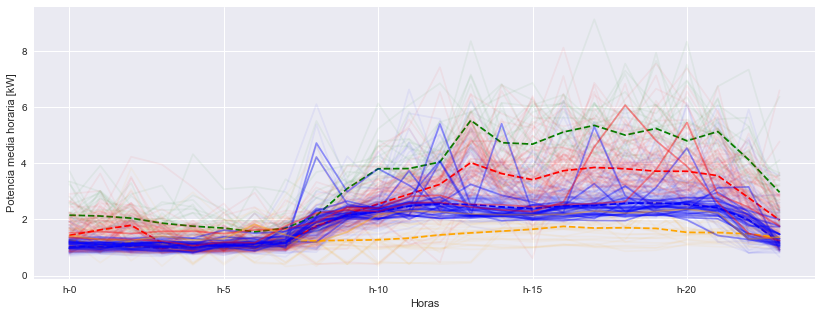

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
color_list = ['blue', 'green', 'red', 'orange']
cluster_values = sorted(df_consumos.index.get_level_values('cluster').unique())

print("CLUSTERS entrenamiento")
for cluster, color in zip(cluster_values, color_list):
    # ploteo todas las lineas de cada cluster
    df_consumos.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.05, color=color)
    # ploteo la línea con el valor de la mediana de cada cluster
    df_consumos.xs(cluster, level=1).median().plot(ax=ax, color=color, legend=False, alpha=1, ls='--')
    print("Color:", color, "se asocia al clúster ", cluster)

#new data
print("CLUSTERS nuevos datos de entrada")
color_list = ['blue', 'red', 'orange']
cluster_values = sorted(new_data.index.get_level_values('cluster').unique())
for cluster, color in zip(cluster_values, color_list):
    # ploteo todas las lineas de cada cluster
    new_data.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.40, color=color)
    # ploteo la línea con el valor de la mediana de cada cluster
    #new_data.xs(cluster, level=1).median().plot(ax=ax, color=color, legend=False, alpha=1, ls='--')   
    print("Color:", color, "se asocia al clúster ", cluster)

    
ax.set_ylabel('Potencia media horaria [kW]')
ax.set_xlabel('Horas')


<div class="alert alert-success">
    <b> Muestro solo los consumos del nuevo dataset, coloreados según su cluster asociado según K-Means </b>
</div>

CLUSTERS nuevos datos de entrada
Color: blue se asocia al clúster  0
Color: red se asocia al clúster  2
Color: orange se asocia al clúster  3


Text(0.5, 0, 'Horas')

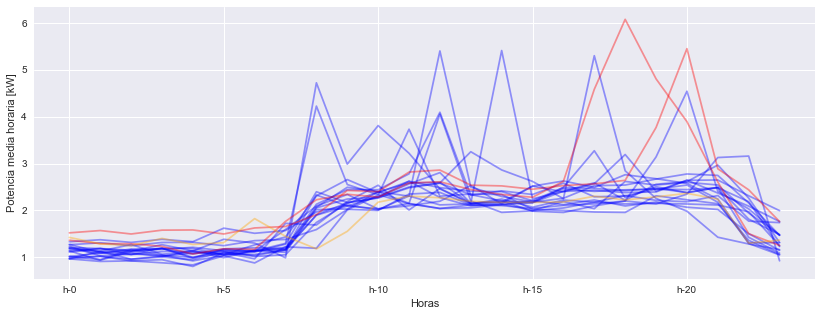

In [38]:
#new data
fig, ax = plt.subplots(1, 1, figsize=(14,5))
print("CLUSTERS nuevos datos de entrada")
color_list = ['blue', 'red', 'orange']
cluster_values = sorted(new_data.index.get_level_values('cluster').unique())
for cluster, color in zip(cluster_values, color_list):
    # ploteo todas las lineas de cada cluster
    new_data.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.40, color=color)
    # ploteo la línea con el valor de la mediana de cada cluster
    #new_data.xs(cluster, level=1).median().plot(ax=ax, color=color, legend=False, alpha=1, ls='--')   
    print("Color:", color, "se asocia al clúster ", cluster)

    
ax.set_ylabel('Potencia media horaria [kW]')
ax.set_xlabel('Horas')